In [1]:
import utils
import warnings

warnings.filterwarnings('ignore')
utils.set_css_style('style.css')

# 3. Evaluation Metrics

Choosing the right metric is crucial while evaluating machine learning (ML) models. Various metrics are proposed to evaluate ML models in different applications. In some applications looking at a single metric may not give you the whole picture of the problem you are solving, and you may want to use a subset of the metrics discussed in this post to have a concrete evaluation of your models.

Whether you're tuning hyperparameters, or trying out different ideas for learning algorithms, or just trying out different options for building your machine learning system. You'll find that your progress will be much faster if you have a single real number evaluation metric that lets you quickly rank ideas and hyperparameters. Therefore, for a successful machine learning project, setting up a single real number evaluation metric is a key. 

Applied machine learning is a very empirical process. We often have an idea, code it up, run the experiment to see how it did, and then use the outcome of the experiment to refine the ideas. And then keep going around this loop as you keep on improving your algorithm.

<img src="figures/ml-idea-iteration.png" alt="ml-idea-iteration" style="width: 400px;"/>

Nevertheless, sometimes it's not always easy to combine all the things you care about into a single evaluation metric. In those cases, it is sometimes useful to set up **satisficing matrics** as well as the **optimizing matric**. 

As a side note, it is also worth mentioning that the evaluation metric is different from loss function. Loss functions are functions that show a measure of the model performance and are used to train a machine learning model (using some kind of optimization), and are usually differentiable in model’s parameters. On the other hand, metrics are used to monitor and measure the performance of a model (during training, and test), and do not need to be differentiable. However if for some tasks the performance metric is differentiable, it can be used both as a loss function (perhaps with some regularizations added to it), and a evaluation metric, such as MSE.

Metrics can be grouped into different categories based on the ML model/application they are mostly used for:

* Classification Metrics (accuracy, precision, recall, F1-score, ROC, AUC, …)
* Regression Metrics (MSE, MAE)
* Statistical Metrics (Correlation)
* Computer Vision Metrics (PSNR, SSIM, IoU)
* NLP Metrics (Perplexity, BLEU score)
* Deep Learning Related Metrics (Inception score, Frechet Inception distance)

Here we will focus on classification and regression metrics.

## 3.1. Regression related metrics


Regression models are another family of machine learning and statistical models, which are used to predict a continuous target values³. They have a wide range of applications, from house price prediction, E-commerce pricing systems, weather forecasting, stock market prediction, to image super resolution, feature learning via auto-encoders, and image compression.

Metrics used to evaluate these models should be able to work on a set of continuous values (with infinite cardinality), and are therefore slightly different from classification metrics.


### 3.1.1. MSE

“Mean squared error” is perhaps the most popular metric used for regression problems. It essentially finds the average squared error between the predicted and actual values.

Let’s assume we have a regression model which predicts the price of houses in Seattle area (denoted by $\hat{y}_i$ ), and let’s say for each house we also have the actual price the house was sold for (denoted by $y_i$). Then the MSE can be calculated as:

\begin{equation}
\mathsf{MSE} = \frac{1}{m} \sum_i^m (\hat{y}_i - y_i)^2
\end{equation}

Where $m$ is the number of observations. The use of square distance allow us to penalize the large distances extremely.

<img src="figures/mse.jpg" alt="mse" style="width: 500px;"/>

### 3.1.2. RMSE 

**RMSE** is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

\begin{equation}
\mathsf{RMSE} = \sqrt{\frac{1}{m} \sum_i^m (\hat{y}_i - y_i)^2}
\end{equation}

Looking at house pricing prediction, RMSE essentially shows what is the average deviation in your model predicted house prices in dollars (same unit) from the target values (the prices the houses are sold for).


### 3.1.3. MAE

Mean absolute error (or mean absolute deviation) is another metric which finds the average absolute distance between the predicted and target values. MAE is define as below:

\begin{equation}
\mathsf{MAE} = \frac{1}{m} \sum_i^m |\hat{y}_i - y_i|
\end{equation}

MAE is known to be more robust to the outliers than MSE. The main reason being that in MSE by squaring the errors, the outliers (which usually have higher errors than other samples) get more attention and dominance in the final error and impacting the model parameters.

### 3.1.4. R-Squared

R Squared is a measurement that tells you to what extent the proportion of variance in the dependent variable (target) is explained by the variance in the predictor variables. In simpler terms, while the coefficients estimate trends, R-squared represents the scatter around the line of best fit.

For example, if the R² is 0.80, then 80% of the variation can be explained by the model’s inputs.
If the R² is 1.0 or 100%, that means that all movements of the dependent variable can be entirely explained by the movements of the independent variables.
To show a visual example, despite having the same line of best fit, the R² on the right is much higher than the one on the left.

<img src="figures/r-squared.png" alt="r-squared" style="width: 800px;"/>

The equation for R² is as follows:

\begin{equation}
\mathsf{R^2} = 1 - \frac{\mathsf{Explained\ Variation}}{\mathsf{Total\ Variation}}
\end{equation}

The Explained Variation is equal to the sum of squared residuals while the total variation is equal to the total sum of squared.

\begin{align*}
\mathsf{SS_{residual}} = \sum_{i=0}^{m} (y_i  -  \hat{y}_i)^2  \\
\mathsf{SS_{total}} = \sum_{i=0}^{m} (y_i  -  \bar{y}_i)^2
\end{align*}

###  3.1.5. Adjusted R-Squared

Every additional independent variable added to a model always increases the R² value — therefore, a model with several independent variables may seem to be a better fit even if it isn’t. This is where Adjusted R² comes in. The adjusted R² compensates for each additional independent variable and only increases if the new term improves the model more than would be expected by chance.


The formula for the Adjusted R-Squared taking into consideration the number of predictors $p$ of the model is then:

\begin{equation}
\mathsf{R^2_{adjusted}} = 1 - \frac{(1 - \mathsf{R^2})(m-1)}{m-p-1}
\end{equation}

While values are usually positive, they can be negative as well. This could happen if your $R^2$ is zero; After the adjustment, the value can dip below zero. This usually indicates that your model is a poor fit for your data. 

## 3.2. Regression metrics with python

Let's consider the same diabetes example we have seen before. We will load our dataset, split it into a training and a testing sets. We will then fit and Linear Regression model and evaluate its performance over the training and the testing sets.

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Let’s load in the diabetes dataset, turn it into a data frame and define the columns’ names:

In [9]:
# Load the Diabetes dataset
columns = ["age","sex","bmi","map","tc","ldl","hdl","tch","ltg","glu"] # columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
print("Dataset shape: ", df.shape, y.shape)

Dataset shape:  (442, 10) (442,)


Now we can use the `train_test_split` function in order to make the split. The `test_size=0.2` inside the function indicates the percentage of the data that should be held over for testing. 

In [10]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)

Training set:  (353, 10) (353,)
Testing set:  (89, 10) (89,)


Training the linear regression model:

In [11]:
# defining Linear Regression model
model_lin = LinearRegression(normalize=True)
# Fitting Linear Regression model over the training set
model_lin.fit(X_train, y_train)

# predicting over training & testing datasets
y_train_pred = model_lin.predict(X_train)
y_test_pred = model_lin.predict(X_test)

Evaluating model over both sets using `sklearn.metrics`:

In [12]:
# model evaluation for training set
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = (np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_train))
print('RMSE is {}'.format(rmse_train))
print('MAE is {}'.format(mae_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# model evaluation for testing set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = (np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('MAE is {}'.format(mae_test))
print('R2 score is {}'.format(r2_test))
print("\n")

The model performance for training set
--------------------------------------
MSE is 2877.1863682742664
RMSE is 53.63941058843084
MAE is 42.996280499750384
R2 score is 0.5137499253152344


The model performance for training set
--------------------------------------
MSE is 2821.8637175436693
RMSE is 53.121217206909606
MAE is 44.947255573196266
R2 score is 0.5250886176863195




## 3.3. Classification related metrics

Classification is one of the most widely used problems in machine learning with various industrial applications, from face recognition, Youtube video categorization, content moderation, medical diagnosis, to text classification, hate speech detection on Twitter.

There are various ways to evaluate a classification model, in this section we'll be covering some of the most popular ones below.

### 3.3.1. Confusion Matrix (not a metric, but important to know!)

One of the key concept in classification performance is the confusion matrix, which is a tabular visualization of the model predictions versus the ground-truth labels. Each row of confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class.

Let’s go through this with an example. Let’s assume we are building a binary classification to classify cat images from non-cat images. And let’s assume our test set has 1100 images (1000 non-cat images, and 100 cat images), with the below confusion matrix.

<img src="figures/cats-cm.png" alt="cats-cm" style="width: 500px;"/>

* Out of 100 cat images the model has predicted 90 of them correctly and has mis-classified 10 of them. If we refer to the “cat” class as positive and the non-cat class as negative class, then 90 samples predicted as cat are considered as as true positive (TP), and the 10 samples predicted as non-cat are false negative (FN).

* Out of 1000 non-cat images, the model has classified 940 of them correctly, and mis-classified 60 of them. The 940 correctly classified samples are referred as true negative (TN), and those 60 are referred as false positive (FP).

As we can see diagonal elements of this matrix denote the correct prediction for different classes, while the off-diagonal elements denote the samples which are mis-classified.

Below is a more general representation of the confusion matrix:

<img src="figures/confusion-matrix.png" alt="confusion-matrix" style="width: 500px;"/>

Now that we have a better understanding of the confusion matrix, let’s get into the actual metrics.

### 3.3.2. Classification Accuracy

Classification accuracy is perhaps the simplest metrics one can imagine, and is defined as the number of correct predictions divided by the total number of predictions. 

\begin{equation}
\mathsf{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} 
\end{equation}

So in the above example, out of 1100 samples 1030 are predicted correctly, resulting in a classification accuracy of:

**Classification accuracy**= (90+940)/(1000+100)= 1030/1100= 93.6%


### 3.3.3. Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class). 

For example in our cat vs non-cat classification above, if the model predicts all samples as non-cat, it would result in a 1000/1100= 90.9%.

Therefore we need to look at class specific performance metrics too. Precision is one of such metrics, which is defined as:

\begin{equation}
\mathsf{Precision} = \frac{TP}{TP + FP} 
\end{equation}

**The precision of the model is interpreted as follows: out of those positively predicted, what is the percentage of observations that are actually positive**.

The precision of Cat and Non-Cat class in the above example can be calculated as:

**Precision_Cat** = #samples correctly predicted cat/#samples predicted as cat = 90 / (90 + 60) = 60%

**Precision_NonCat** = 940 / 950 = 98.9%

As we can see the model has much higher precision in predicting non-cat samples, versus cats. This is not surprising, as model has seen more examples of non-cat images during training, making it better in classifying that class.


###  3.3.4. Recall 

Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

\begin{equation}
\mathsf{Recall} = \frac{TP}{TP + FN} 
\end{equation}

Therefore, for our example above, the recall rate of cat and non-cat classes can be found as:

**Recall_Cat** = 90 / 100 = 90%

**Recall_NonCat** = 940 / 1000 = 94%

### 3.3.5. F1 Score

Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:

\begin{equation}
\mathsf{F1score} = 2*\frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision}+\mathsf{Recall}} 
\end{equation}

#### Why is the F-Measure a harmonic mean and not an arithmetic mean of the Precision and Recall measures?

This is just for a quick reference to understand the nature of the arithmetic mean and the harmonic mean with plots. As you can see from the plot, consider the X axis and Y axis as precision and recall, and the Z axis as the F1 Score. So, from the plot of the harmonic mean, both the precision and recall should contribute evenly for the F1 score to rise up unlike the Arithmetic mean.

This is for the arithmetic mean.

<img src="figures/arithmetic-mean.jpg" alt="arithmetic-mean" style="width: 300px;"/>

This is for the harmonic mean.

<img src="figures/harmonic-mean.jpg" alt="harmonic-mean" style="width: 300px;"/>

So for our cat classification example, the F1-score can be calculated as:

**F1-score**= 2 * 0.6 * 0.9  / (0.6 + 0.9) = 72%

The generalized version of F-score is defined as below. As we can see F1-score is special case of $F_{\beta }$ when $\beta= 1$, where $\beta$ is chosen such that recall is considered $\beta$ times as important as precision.

\begin{equation}
{\displaystyle F_{\beta }=(1+\beta ^{2})\cdot {\frac {\mathsf {Precision} \cdot \mathsf {Recall} }{(\beta ^{2}\cdot \mathsf {Precision} )+\mathsf {Recall} }}}
\end{equation}

It is good to mention that there is always a trade-off between precision and recall of a model, if you want to make the precision too high, you would end up seeing a drop in the recall rate, and vice versa.

### 3.3.6. Sensitivity and Specificity

Sensitivity and specificity are two other popular metrics mostly used in medical and biology related fields, and are defined as:

\begin{equation}
{\displaystyle \mathsf{Sensitivity} = \mathsf{Recall} = \frac{TP}{TP+FN} }
\end{equation}

\begin{equation}
\mathsf{Specificity} = \mathsf{True \ Negative \ Rate} = \frac{TN}{TN+FP}
\end{equation}

### 3.3.7. Receiver Operating Characteristic Curve

The receiver operating characteristic (ROC) curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values. Let’s explain more.
Many of the classification models are probabilistic, i.e. they predict the probability of a sample being a cat. They then compare that output probability with some cut-off threshold and if it is larger than the threshold they predict its label as cat, otherwise as non-cat. As an example your model may predict the below probabilities for 4 sample images: [0.45, 0.6, 0.7, 0.3]. Then depending on the threshold values below, you will get different labels:

* cut-off= 0.5: predicted-labels= [0,1,1,0] (default threshold)
* cut-off= 0.2: predicted-labels= [1,1,1,1]
* cut-off= 0.8: predicted-labels= [0,0,0,0]

As you can see by varying the threshold values, we will get completely different labels. And as you can imagine each of these scenarios would result in a different precision and recall (as well as TPR, FPR) rates.

ROC curve essentially finds out the TPR and FPR for various threshold values and plots TPR against the FPR. A sample ROC curve is shown in Figure below.

<img src="figures/roc-curve.png" alt="roc-curve" style="width: 500px;"/>

As we can see from this example, the lower the cut-off threshold on positive class, the more samples predicted as positive class, i.e. higher true positive rate (recall) and also higher false positive rate (corresponding to the right side of this curve). Therefore, there is a trade-off between how high the recall could be versus how much we want to bound the error (FPR).
ROC curve is a popular curve to look at overall model performance and pick a good cut-off threshold for the model.

### 3.3.8. AUC

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant).

AUC calculates the area under the ROC curve, and therefore it is between 0 and 1. **One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example**.

<img src="figures/AUC.png" alt="AUC" style="width: 400px;"/>

On high-level, the higher the AUC of a model the better it is. But sometimes threshold independent measure is not what you want, e.g. you may care about your model recall and require that to be higher than 99% (while it has a reasonable precision or FPR). In that case, you may want to tune your model threshold such that it meets your minimum requirement on those metrics (and you may not care if you model AUC is not too high).

Therefore in order to decide how to evaluate your classification model performance, perhaps you want to have a good understanding of the business/problem requirement and the impact of low recall vs. low precision, and decide what metric to optimize for.

From a practical standpoint, a classification model which outputs probabilities is preferred over a single label output, as it provides the flexibility of tuning the threshold such that it meets your minimum recall/precision requirements. Not all models provide this nice probabilistic outputs though, e.g. SVM does not provide a simple probability as an output (although it provides margin which can be used to tune the decision, but it is not as straightforward and interpretable as having output probabilities).

## 3.4. Classification metrics with python

In the proceeding example, we’ll take a look at all the metrics in action. For simplicity, we’ll be using one of the datasets provided by sklearn.

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt

Let's load the breast cancer dataset, and explore available features and target. The breast cancer dataset is a classic and very easy binary classification dataset. The objective of our model is to predict whether a patient has breast cancer or not given the available features. 

In [14]:
breast_cancer = datasets.load_breast_cancer()

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Let's prepare our data for training and evaluation:

In [15]:
X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

We’ll be using the logistic regression classifier but any classification algorithm will do.

In [16]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred = lgr.predict(X_test)

### Confusion Matrix

In [17]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[ 58,   5],
       [  6, 102]])

`scikit-learn` also offers a nice function to plot the confusion matrix.

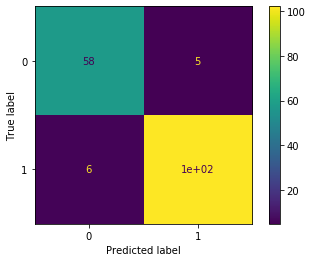

In [18]:
metrics.plot_confusion_matrix(lgr, X_test, y_test)

### Accuracy

Accuracy of our model:

In [19]:
metrics.accuracy_score(y_test, y_test_pred)

0.935672514619883

### Recall

The recall of each class:

In [20]:
metrics.recall_score(y_test, y_test_pred, average=None)

array([0.92063492, 0.94444444])

### Precision

The precision of each class:

In [21]:
metrics.precision_score(y_test, y_test_pred, average=None)

array([0.90625   , 0.95327103])

### F1score

The f1score of each class:

In [22]:
metrics.f1_score(y_test, y_test_pred, average=None)

array([0.91338583, 0.94883721])

### Receiver Operating Characteristic - AUC

In able to plot ROC or evaluate AUC, we need the probability outputs of our model instead of the final prediction.

We call the `predict_proba` method rather than `predict` in order to obtain a list of probabilities which represent the likelihood that a sample falls under a given category. 

In [23]:
probs = lgr.predict_proba(X_test)
malignant_probs = probs[:,1]

# calculating roc arguments
fpr, tpr, thresholds = metrics.roc_curve(y_test, malignant_probs)
# calculating auc
roc_auc = metrics.auc(fpr, tpr)

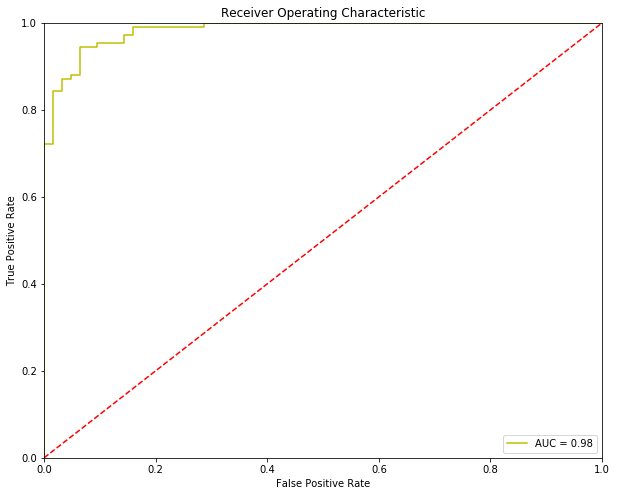

In [24]:
plt.figure(figsize=[10,8])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()